<a href="https://colab.research.google.com/github/guilhermelaviola/IntegrativePracticeInDataScience/blob/main/Class13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Intelligence Applications**
Business intelligence (BI) involves tools and techniques for data collection, analysis, and visualization to support decision-making in companies. It employs dimensional modeling to structure data for complex analyses, revealing patterns and trends. Tools like Power BI, Tableau, and Quick View, along with the ETL (Extraction, Transformation, and Loading) process, ensure data quality by extracting, transforming, and loading data into a Data Warehouse. BI aids in analyzing consumer behavior, optimizing marketing, forecasting sales, and managing costs, while interactive dashboards and custom reports enhance data visualization. Ultimately, BI helps businesses derive actionable insights, enhancing decision-making and fostering growth in a competitive market.

In [1]:
# Importing all the necessary libraries and resources:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Sample ETL Pipeline**

In [2]:
# Data Extraction, Transformation and Loading with simulated raw data:
customers = pd.DataFrame({
    'customer_id': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charles'],
    'region': ['North', 'South', 'East']
})

products = pd.DataFrame({
    'product_id': [101, 102, 103],
    'product_name': ['Laptop', 'Mouse', 'Keyboard'],
    'category': ['Electronics', 'Accessories', 'Accessories']
})

sales = pd.DataFrame({
    'sale_id': [1001, 1002, 1003, 1004],
    'customer_id': [1, 2, 1, 3],
    'product_id': [101, 103, 102, 101],
    'quantity': [1, 2, 1, 1],
    'unit_price': [1200, 50, 25, 1150],
    'date': pd.to_datetime(['2025-01-05', '2025-01-06',
                            '2025-01-07', '2025-01-08'])
})

## **Data transformation**

In [3]:
# Adding computed column:
sales['total_value'] = sales['quantity'] * sales['unit_price']

# Fact Table: FactSales (star schema):
fact_sales = sales.merge(customers, on='customer_id') \
                  .merge(products, on='product_id')

print('Fact Table\n', fact_sales)

Fact Table
    sale_id  customer_id  product_id  quantity  unit_price       date  \
0     1001            1         101         1        1200 2025-01-05   
1     1002            2         103         2          50 2025-01-06   
2     1003            1         102         1          25 2025-01-07   
3     1004            3         101         1        1150 2025-01-08   

   total_value     name region product_name     category  
0         1200    Alice  North       Laptop  Electronics  
1          100      Bob  South     Keyboard  Accessories  
2           25    Alice  North        Mouse  Accessories  
3         1150  Charles   East       Laptop  Electronics  


## **Data loading**

In [4]:
# Simulated 'loading' step:
data_warehouse = fact_sales.copy()
print('\nLoaded into Data Warehouse.\n')


Loaded into Data Warehouse.



## **BI analysis**

In [6]:
# Sales by product category:
sales_by_category = (
    data_warehouse.groupby('category')['total_value']
    .sum()
    .reset_index()
)

print('Sales by Category:\n', sales_by_category)

# Customer behavior; total spending per customer:
customer_value = (
    data_warehouse.groupby('name')['total_value']
    .sum()
    .sort_values(ascending=False)
)

print('\nCustomer Lifetime Value:\n', customer_value)

# Daily sales trend:
daily_sales = (
    data_warehouse.groupby('date')['total_value']
    .sum()
    .reset_index()
)

print('\nDaily Sales Trend:\n', daily_sales)


Sales by Category:
       category  total_value
0  Accessories          125
1  Electronics         2350

Customer Lifetime Value:
 name
Alice      1225
Charles    1150
Bob         100
Name: total_value, dtype: int64

Daily Sales Trend:
         date  total_value
0 2025-01-05         1200
1 2025-01-06          100
2 2025-01-07           25
3 2025-01-08         1150


## **Visualization**

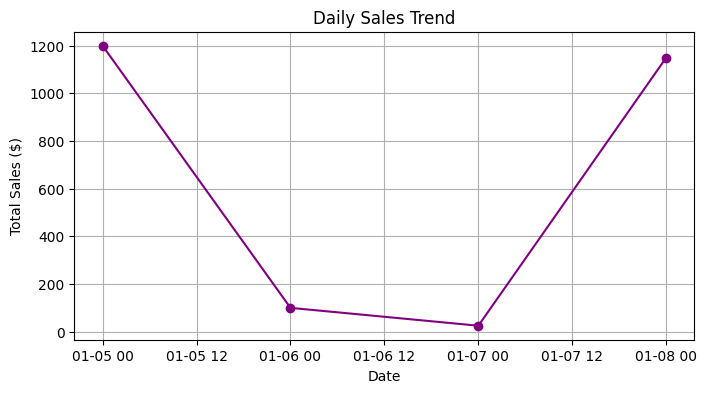

In [8]:
# Displaying te chart with data:
plt.figure(figsize=(8,4))
plt.plot(daily_sales['date'], daily_sales['total_value'], marker='o', color='purple')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()